In [11]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [12]:
df = pd.read_excel("AVH.xlsx")
print(df.head())

print(df.shape)

   Date/Time  Weekday        CDD  HDD         DD  CHWton*hrs  ELECkWh  \
0 2020-07-01        4  22.372673  0.0 -22.372673   1526.3090   2014.0   
1 2020-07-02        5  24.483854  0.0 -24.483854   1662.5252   2110.0   
2 2020-07-06        2  27.820660  0.0 -27.820660   1972.9905   2194.0   
3 2020-07-07        3  28.595104  0.0 -28.595104   1782.8237   2128.0   
4 2020-07-08        4  30.337639  0.0 -30.337639   1824.8944   2138.0   

    STEAMLB     CHWkBTU  ELECkBTU  STEAMkBTU  Day Type       TEMP     SUMkBTU  
0  4598.190 -18315.7080  6871.768   4598.190         0  77.372673  -6845.7500  
1  4549.788 -19950.3024  7199.320   4549.788         0  79.483854  -8201.1944  
2  3791.490 -23675.8860  7485.928   3791.490         0  82.820660 -12398.4680  
3  4025.433 -21393.8844  7260.736   4025.433         0  83.595104 -10107.7154  
4  4001.232 -21898.7328  7294.856   4001.232         0  85.337639 -10602.6448  
(730, 14)


In [13]:
# Split dataset to weekday and weekend datasets
df_weekday = df[df["Weekday"] <= 5]
df_weekend = df[df["Weekday"] > 5]

# Split last 30 rows as test set for plotting purposes
df_weekday_test = df_weekday.iloc[-30:]
weekday_train_length = df_weekday.shape[0] - df_weekday_test.shape[0]
df_weekday_train = df_weekday.iloc[0:weekday_train_length]
df_weekend_test = df_weekend.iloc[-30:]
weekend_train_length = df_weekend.shape[0] - df_weekend_test.shape[0]
df_weekend_train = df_weekend.iloc[0:weekend_train_length]

print(df_weekday.shape)
print(df_weekend.shape)
print(df_weekday_train.shape)
print(df_weekday_test.shape)
print(df_weekend_train.shape)
print(df_weekend_test.shape)

(517, 14)
(213, 14)
(487, 14)
(30, 14)
(183, 14)
(30, 14)


In [55]:
# Define X and Y in a linear regression
X_weekday_train = df_weekday_train[["TEMP"]]
X_weekday_test = df_weekday_test[["TEMP"]]
X_weekend_train = df_weekend_train[["TEMP"]]
X_weekend_test = df_weekend_test[["TEMP"]]
Y_weekday_train = df_weekday_train[["CHWkBTU", "ELECkBTU", "STEAMkBTU", "SUMkBTU"]]
Y_weekday_test = df_weekday_test[["CHWkBTU", "ELECkBTU", "STEAMkBTU", "SUMkBTU"]]
Y_weekend_train = df_weekend_train[["CHWkBTU", "ELECkBTU", "STEAMkBTU", "SUMkBTU"]]
Y_weekend_test = df_weekend_test[["CHWkBTU", "ELECkBTU", "STEAMkBTU", "SUMkBTU"]]

,TEMP
672,19.241305
676,6.862313
677,28.239264
679,21.853777
681,30.285258
682,37.544890
684,33.387398
686,36.775402
688,36.205189
690,26.596344


Coefficient:  -316.5633014832989 , Intercept:  9363.789332038445
R^2 Train:  0.7229817084621079
MAE Train:  2597.9782881571277
R^2 Test:  0.6292548695899924
MAE Test:  3202.1889111338573


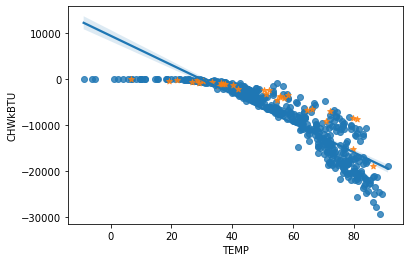

Coefficient:  0.3020555124505276 , Intercept:  6498.203081947525
R^2 Train:  -18448.11691579502
MAE Train:  674.5150433724675
R^2 Test:  -46406.98222265011
MAE Test:  1199.2575867922658


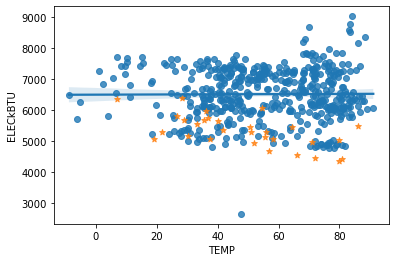

Coefficient:  -232.65584949061628 , Intercept:  21828.0340217192
R^2 Train:  0.6851844128183829
MAE Train:  1793.1761625585516
R^2 Test:  0.2617045872210203
MAE Test:  2949.869679872452


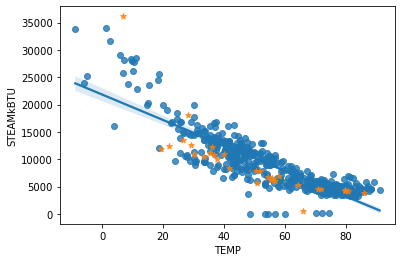

Coefficient:  -548.9170954614646 , Intercept:  37690.026435705164
R^2 Train:  0.9247980651362934
MAE Train:  2384.91231869043
R^2 Test:  0.8648088763370637
MAE Test:  3055.187042571719


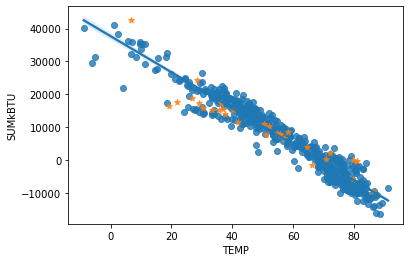

,672,676,692,698,700,704,706,710,712,714,...,676,679,681,684,690,696,708,720,721,729
Date/Time,2021-12-29 00:00:00,2022-01-02 00:00:00,2022-02-20 00:00:00,2022-03-13 00:00:00,2022-03-20 00:00:00,2022-04-03 00:00:00,2022-04-10 00:00:00,2022-04-24 00:00:00,2022-05-01 00:00:00,2022-05-08 00:00:00,...,2022-01-02 00:00:00,2022-01-09 00:00:00,2022-01-16 00:00:00,2022-01-23 00:00:00,2022-02-13 00:00:00,2022-03-06 00:00:00,2022-04-17 00:00:00,2022-05-29 00:00:00,2022-05-30 00:00:00,2022-06-26 00:00:00
Weekday,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
CDD,0.0,0.0,2.641208,3.734396,9.231205,2.022656,3.169705,0.494101,3.545712,9.441283,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.796808,24.723075,16.90782
HDD,35.758226,48.137943,7.094255,6.899973,6.103064,2.413153,2.422877,4.503779,2.985798,0.0,...,48.137943,33.146901,24.715538,21.612657,28.393187,25.90717,13.187133,0.0,0.0,0.0
DD,35.758226,48.137943,4.453047,3.165577,-3.128141,0.390497,-0.746827,4.009678,-0.559914,-9.441283,...,48.137943,33.146901,24.715538,21.612657,28.393187,25.90717,13.187133,-25.796808,-24.723075,-16.90782
CHWton*hrs,38.683332,0.0,198.98499,193.28081,295.42406,377.95687,315.33807,277.52028,321.10296,566.6405,...,0.0,18.631353,43.61296,57.164708,53.931505,68.00131,182.77636,730.7972,709.9517,584.6918
ELECkWh,1488.0,1860.0,1598.0,1444.0,1480.0,1782.0,1546.0,1550.0,1506.0,1600.0,...,1860.0,1546.0,1514.0,1626.0,1704.0,1668.0,1574.0,1290.0,1280.0,1300.0
STEAMLB,11866.557,36148.23,7792.722,7816.923,6969.888,6816.615,6493.935,5703.369,6187.389,5340.354,...,36148.23,12487.716,11043.723,10479.033,13568.694,12568.386,8454.216,4138.371,4194.84,4573.989
CHWkBTU,-464.199984,0.0,-2387.81988,-2319.36972,-3545.08872,-4535.48244,-3784.05684,-3330.24336,-3853.23552,-6799.686,...,0.0,-223.576236,-523.35552,-685.976496,-647.17806,-816.01572,-2193.31632,-8769.5664,-8519.4204,-7016.3016
ELECkBTU,5077.056,6346.32,5452.376,4926.928,5049.76,6080.184,5274.952,5288.6,5138.472,5459.2,...,6346.32,5274.952,5165.768,5547.912,5814.048,5691.216,5370.488,4401.48,4367.36,4435.6


In [87]:
# Plot linear regression using for loop
max_r = 4
df_highlight = pd.DataFrame()

for i in range(max_r):
    lr = LinearRegression()
    lr.fit(X_weekday_train,Y_weekday_train.iloc[:,i])
    print("Coefficient: ", lr.coef_[0],", Intercept: ", lr.intercept_)
    ypred_train = lr.predict(X_weekday_train)
    ypred_test = lr.predict(X_weekday_test)
    print("R^2 Train: ", r2_score(ypred_train, Y_weekday_train.iloc[:,i]))
    print("MAE Train: ", mean_absolute_error(ypred_train, Y_weekday_train.iloc[:,i]))
    print("R^2 Test: ", r2_score(ypred_test, Y_weekday_test.iloc[:,i]))
    print("MAE Test: ", mean_absolute_error(ypred_test, Y_weekday_test.iloc[:,i]))
            #index = X_weekday_test.iloc[j][0]
    sns.regplot(x=X_weekday_train, y=Y_weekday_train.iloc[:,i])
    sns.regplot(x=X_weekday_test, y=Y_weekday_test.iloc[:,i], marker='*', fit_reg=False)
    plt.show()

    MAE = mean_absolute_error(ypred_test, Y_weekday_test.iloc[:,i])
    for j in range(len(X_weekday_test)):
        #print(X_weekday_test.iloc[j])
        k = len(X_weekday_train) + j
        if (abs(Y_weekday_test.iloc[j,i] - ypred_test[j])) > MAE:
            df_highlight = pd.concat([df_highlight, df_weekday_test.iloc[j]], axis=1)
            
df_highlight

Coefficient:  -262.18832919236473 , Intercept:  7675.494796330203
R^2 Train:  0.6342840861522498
MAE Train:  2573.2070158012534
R^2 Test:  0.7125599492476653
MAE Test:  2376.9333109277836


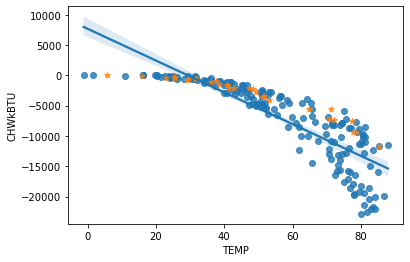

Coefficient:  -1.472180209463874 , Intercept:  6073.885636743693
R^2 Train:  -639.6485801534837
MAE Train:  650.7501323715103
R^2 Test:  -859.0266417944958
MAE Test:  752.7328318773851


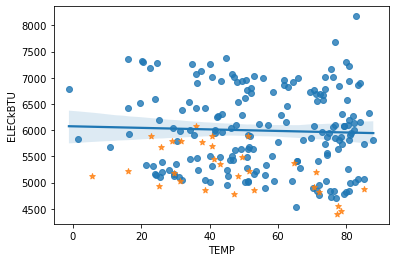

Coefficient:  -183.2483322072236 , Intercept:  18140.02553224873
R^2 Train:  0.6006127423782036
MAE Train:  1746.0358316770353
R^2 Test:  0.8677438342259468
MAE Test:  1093.9882773759414


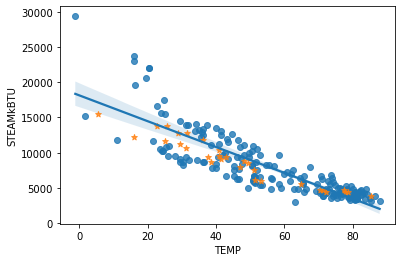

Coefficient:  -446.9088416090521 , Intercept:  31889.40596532262
R^2 Train:  0.8730546335683277
MAE Train:  2684.625172219937
R^2 Test:  0.889115997703277
MAE Test:  2240.940100351749


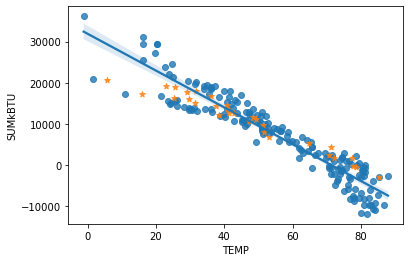

In [23]:
# Plot linear regression using for loop
for i in range(max_r):
    lr = LinearRegression()
    lr.fit(X_weekend_train,Y_weekend_train.iloc[:,i])
    print("Coefficient: ", lr.coef_[0],", Intercept: ", lr.intercept_)
    ypred_train = lr.predict(X_weekend_train)
    ypred_test = lr.predict(X_weekend_test)
    print("R^2 Train: ", r2_score(ypred_train, Y_weekend_train.iloc[:,i]))
    print("MAE Train: ", mean_absolute_error(ypred_train, Y_weekend_train.iloc[:,i]))
    print("R^2 Test: ", r2_score(ypred_test, Y_weekend_test.iloc[:,i]))
    print("MAE Test: ", mean_absolute_error(ypred_test, Y_weekend_test.iloc[:,i]))
    #plt.scatter(X_weekday,Y_weekday.iloc[:,i], color='green')
    sns.regplot(x=X_weekend_train, y=Y_weekend_train.iloc[:,i])
    sns.regplot(x=X_weekend_test, y=Y_weekend_test.iloc[:,i], marker='*', fit_reg=False)
    plt.show()